In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df_full = pd.read_csv('dataload_2021-05-28.csv', index_col="date", parse_dates=["date"])
df_full.dropna(inplace=True)
df = df_full[:4000]
df_eval = df_full[4001:]

In [3]:
df.sort_index(axis=0, ascending=True, inplace=True)

In [4]:
x = df.drop(['1. open', '2. high', '3. low', '5. adjusted close', '7. dividend amount', '8. split coefficient',
             'shifted_ROC_BOOL'], axis=1).copy()

x.head()

,4. close,6. volume,roc,sma,ema,rsi,obv,MACD_Signal,MACD,MACD_Hist,SlowK,SlowD,adx,cci,Aroon Up,Aroon Down,Real Lower Band,Real Middle Band,Real Upper Band,ad
date,,,,,,,,,,,,,,,,,,,,
1999-12-28,28.75,780300.0,-0.6565,14.6350,14.2512,58.0771,43062400.0,0.7219,0.4981,-0.2239,27.4304,35.4404,43.5091,-48.0229,35.0,60.0,13.4313,14.6350,15.8387,6.374274e+07
1999-12-29,28.44,522600.0,-1.0783,14.6398,14.2483,57.0397,42017200.0,0.6661,0.4426,-0.2235,28.5393,29.0019,42.3421,-69.9336,30.0,55.0,13.4434,14.6398,15.8361,6.383307e+07
1999-12-30,28.44,892400.0,0.0000,14.6633,14.2456,57.0397,42017200.0,0.6117,0.3941,-0.2176,30.6254,28.8651,41.1439,-82.6652,25.0,50.0,13.5204,14.6633,15.8061,6.444066e+07
1999-12-31,28.94,882800.0,1.7581,14.6243,14.2670,58.3687,43782800.0,0.5636,0.3716,-0.1921,52.7724,37.3124,40.0687,-52.8434,20.0,45.0,13.5113,14.6243,15.7372,6.620626e+07
2000-01-03,31.00,3921600.0,7.1182,14.6243,14.3844,63.2931,51626000.0,0.5373,0.4318,-0.1055,77.1122,53.5034,39.6958,113.0544,15.0,40.0,13.5113,14.6243,15.7372,7.240282e+07


In [5]:
x.corr(method='spearman')

,4. close,6. volume,roc,sma,ema,rsi,obv,MACD_Signal,MACD,MACD_Hist,SlowK,SlowD,adx,cci,Aroon Up,Aroon Down,Real Lower Band,Real Middle Band,Real Upper Band,ad
4. close,1.000000,-0.319282,0.024540,0.988182,0.990414,0.199583,0.848613,0.129815,0.119678,0.043096,0.075745,0.080481,0.085651,0.102886,0.095910,-0.099667,0.982409,0.988182,0.983649,0.893689
6. volume,-0.319282,1.000000,-0.002885,-0.311382,-0.311540,-0.058037,-0.385754,-0.039820,-0.044586,-0.028213,-0.013595,-0.008805,0.084547,-0.040379,0.059982,0.116990,-0.300251,-0.311382,-0.312439,-0.484374
roc,0.024540,-0.002885,1.000000,-0.022926,-0.020960,0.282785,0.035498,0.044758,0.082673,0.165896,0.278479,0.106085,0.021470,0.328551,0.089993,-0.119500,-0.023259,-0.022926,-0.023410,0.008359
sma,0.988182,-0.311382,-0.022926,1.000000,0.999478,0.088581,0.845094,0.060579,0.028375,-0.046378,-0.015282,-0.010870,0.072703,-0.014269,0.015150,-0.015117,0.992587,1.000000,0.996145,0.892491
ema,0.990414,-0.311540,-0.020960,0.999478,1.000000,0.098931,0.846498,0.061858,0.035645,-0.024437,-0.004227,0.003083,0.074907,0.003055,0.026244,-0.026642,0.992051,0.999478,0.995648,0.893823
rsi,0.199583,-0.058037,0.282785,0.088581,0.098931,1.000000,0.211138,0.784772,0.869481,0.416035,0.606024,0.621833,0.016684,0.827443,0.680381,-0.702991,0.099584,0.088581,0.076402,0.111019
obv,0.848613,-0.385754,0.035498,0.845094,0.846498,0.211138,1.000000,0.133987,0.127973,0.046181,0.082085,0.088539,-0.019088,0.119404,0.114860,-0.114102,0.846681,0.845094,0.836649,0.755911
MACD_Signal,0.129815,-0.039820,0.044758,0.060579,0.061858,0.784772,0.133987,1.000000,0.949093,0.038669,0.204898,0.263710,0.063332,0.436924,0.576236,-0.561520,0.073014,0.060579,0.047946,0.041966
MACD,0.119678,-0.044586,0.082673,0.028375,0.035645,0.869481,0.127973,0.949093,1.000000,0.260167,0.352180,0.425902,0.074848,0.617616,0.660346,-0.665752,0.040334,0.028375,0.016337,0.034954
MACD_Hist,0.043096,-0.028213,0.165896,-0.046378,-0.024437,0.416035,0.046181,0.038669,0.260167,1.000000,0.605708,0.669935,0.077472,0.708042,0.370951,-0.393087,-0.051247,-0.046378,-0.045281,0.034886


In [6]:
y = df['shifted_ROC_BOOL'].copy()
y.head()

date
1999-12-28    0
1999-12-29    1
1999-12-30    1
1999-12-31    1
2000-01-03    0
Name: shifted_ROC_BOOL, dtype: int64

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, shuffle=False)

In [8]:
x_eval = df_eval.drop(
    ['1. open', '2. high', '3. low', '5. adjusted close', '7. dividend amount', '8. split coefficient',
     'shifted_ROC_BOOL'], axis=1).copy()
y_eval = df_eval['shifted_ROC_BOOL'].copy()

eval_set = [(xgb.DMatrix(x_eval, label=y_eval), 'eval')]

In [9]:
def generate_metrics(y_train,y_test,predictions, predictions_in_sample):
    from sklearn.metrics import accuracy_score, precision_score, recall_score
    from sklearn.metrics import f1_score, confusion_matrix, ConfusionMatrixDisplay

    accuracy_out = accuracy_score(y_test, predictions)
    accuracy_in = accuracy_score(y_train, predictions_in_sample)

    precision_out = precision_score(y_test, predictions)
    precision_in = precision_score(y_train, predictions_in_sample)

    recall_out = recall_score(y_test, predictions)
    recall_in = recall_score(y_train, predictions_in_sample)

    f_score_out = f1_score(y_test, predictions)
    f_score_in = f1_score(y_train, predictions_in_sample)

    print(f"Accuracy out-of-sample: {accuracy_out}")
    print(f"Precision out-of-sample: {precision_out}")
    print(f"Recall out-of-sample: {recall_out}")
    print(f"FScore out-of-sample: {f_score_out}\n")

    print(f"Accuracy in-sample: {accuracy_in}")
    print(f"Precision in-sample: {precision_in}")
    print(f"Recall in-sample: {recall_in}")
    print(f"FScore in-sample: {f_score_in}")
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    cm_out = confusion_matrix(y_test, predictions) / len(y_test) * 100
    cm_in = confusion_matrix(y_train, predictions_in_sample) / len(y_train) * 100

    ax[0].set_title("Confusion Matrix - Out-of-Sample")
    ax[1].set_title("Confusion Matrix - In-Sample")

    ax[0] = ConfusionMatrixDisplay(confusion_matrix=cm_out).plot(ax=ax[0], cmap='Greys')
    ax[1] = ConfusionMatrixDisplay(confusion_matrix=cm_in).plot(ax=ax[1], cmap='Greys')

    plt.show()
    xgb.plot_importance(model)
    plt.show()

In [10]:
train = xgb.DMatrix(x_train, label=y_train)
test = xgb.DMatrix(x_test, label=y_test)
param = {
    'max_depth': 14,
    'eta': 0.2,
    'objective': 'binary:hinge',
    'gamma': 2,
    'subsample': 0.33,
    'eval_metric': 'error' # Binary classification error rate 
}
epochs = 300

model = xgb.train(params=param, dtrain=train, num_boost_round=epochs, evals=eval_set, early_stopping_rounds=20)

[0]	eval-error:0.46465
[1]	eval-error:0.46465
[2]	eval-error:0.46609
[3]	eval-error:0.47330
[4]	eval-error:0.47186
[5]	eval-error:0.47619
[6]	eval-error:0.47042
[7]	eval-error:0.47403
[8]	eval-error:0.46609
[9]	eval-error:0.45960
[10]	eval-error:0.46465
[11]	eval-error:0.47403
[12]	eval-error:0.47258
[13]	eval-error:0.47475
[14]	eval-error:0.47547
[15]	eval-error:0.47475
[16]	eval-error:0.47691
[17]	eval-error:0.48340
[18]	eval-error:0.46753
[19]	eval-error:0.47691
[20]	eval-error:0.46681
[21]	eval-error:0.47186
[22]	eval-error:0.47330
[23]	eval-error:0.48268
[24]	eval-error:0.47691
[25]	eval-error:0.48052
[26]	eval-error:0.48990
[27]	eval-error:0.47042
[28]	eval-error:0.47619
[29]	eval-error:0.47330


Accuracy out-of-sample: 0.53125
Precision out-of-sample: 0.5660377358490566
Recall out-of-sample: 0.5568445475638051
FScore out-of-sample: 0.5614035087719297

Accuracy in-sample: 0.9253125
Precision in-sample: 0.9183796856106409
Recall in-sample: 0.9359211337030191
FScore in-sample: 0.9270674397314617


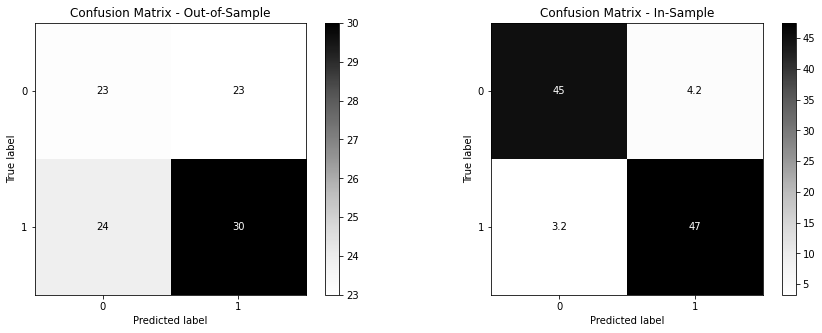

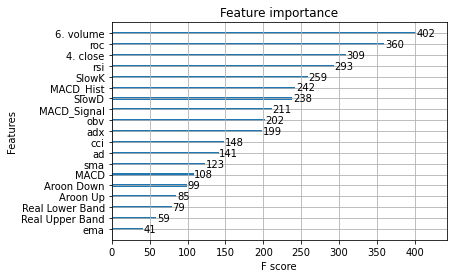

In [11]:
predictions_in_sample = model.predict(train)
predictions = model.predict(test)

generate_metrics(y_train, y_test, predictions, predictions_in_sample)

### "Well" working params: 

param = {
    'max_depth': 11,
    'eta': 0.1,
    'objective': 'binary:hinge',
    'gamma': 2,
    'subsample': 0.33,
    'eval_metric': 'error' # Binary classification error rate 
}
epochs = 300 # Epochs are limited by early stopping